In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [158]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [8]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
import pandas_profiling

## EDA 

In [6]:
train.profile_report()

<AxesSubplot:xlabel='Delivery_Time', ylabel='count'>

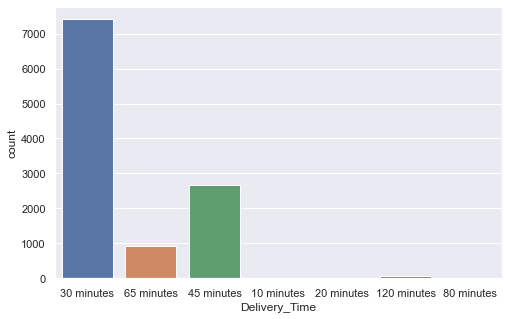

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(train.Delivery_Time)

In [8]:
# dataset is imbalanced

(array([7579., 1333.,  615.,  522.,  294.,  228.,  184.,  145.,  105.,
          89.]),
 array([  0.,  76., 152., 228., 304., 380., 456., 532., 608., 684., 760.]),
 <BarContainer object of 10 artists>)

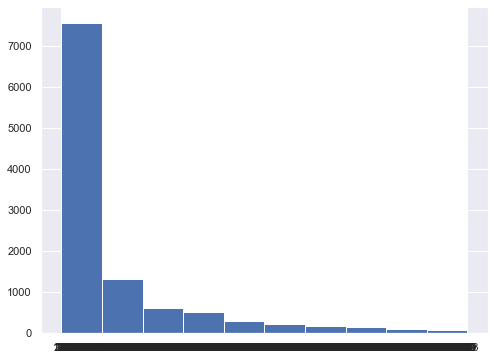

In [12]:
plt.figure(figsize=(8,6))
plt.hist(train['Reviews'])

In [13]:
# number of reviews are right skewed

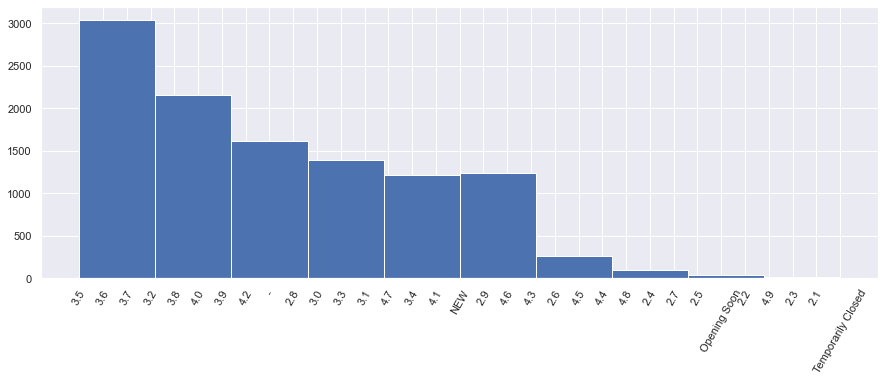

In [25]:
plt.figure(figsize=(15,5))
plt.hist(train['Rating'])
plt.xticks(rotation=60)
plt.show()

In [26]:
# majority of rating falls under 3.5 - 4.0

<AxesSubplot:xlabel='Average_Cost', ylabel='Density'>

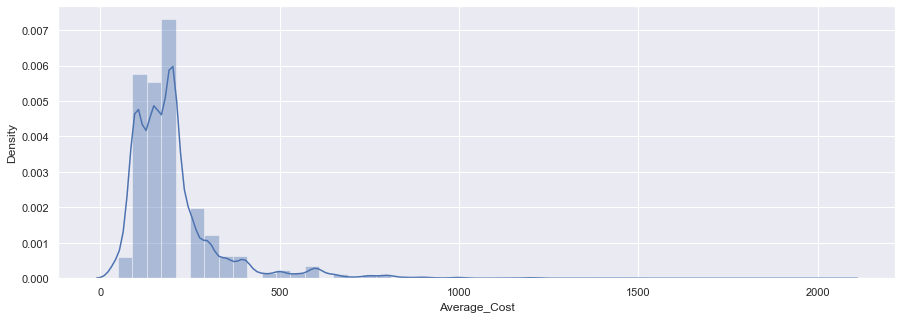

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(pd.to_numeric(train['Average_Cost'].str[1:].str.replace(',',''), errors='coerce'))

In [35]:
# found that most of the shops' average cost of fooding lying between Rs 100 - 400

<AxesSubplot:xlabel='Average_Cost', ylabel='count'>

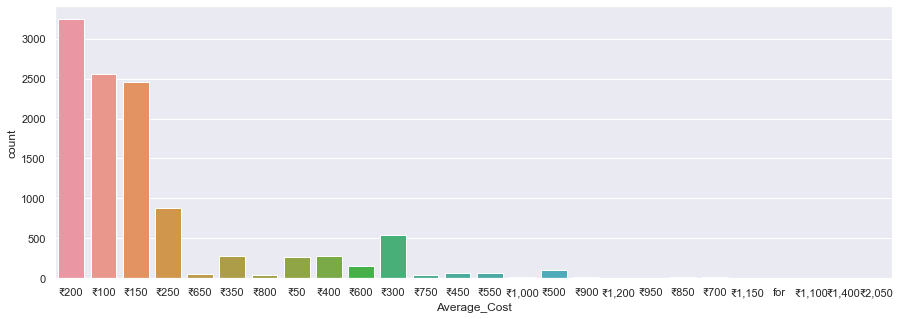

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(train.Average_Cost)

## feature engineering

In [159]:
train_target=train['Delivery_Time'].apply(lambda x: x.split()[0]).astype(int)
class_map={}
class_reverse_map={}
for j,k in enumerate(sorted(train_target.unique())):
    class_map[k]=j
    class_reverse_map[j]=k

In [40]:
train_target=train_target.map(class_map)

In [41]:
train.drop('Delivery_Time',axis=1,inplace=True)

In [42]:
df=pd.concat([train,test],axis=0,sort=False,ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13868 entries, 0 to 13867
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     13868 non-null  object
 1   Location       13868 non-null  object
 2   Cuisines       13868 non-null  object
 3   Average_Cost   13868 non-null  object
 4   Minimum_Order  13868 non-null  object
 5   Rating         13868 non-null  object
 6   Votes          13868 non-null  object
 7   Reviews        13868 non-null  object
dtypes: object(8)
memory usage: 866.9+ KB


In [43]:
# extracting unique Cuisines for every shops
def unique_cuisines():
    cuisines_list = [val for val in df['Cuisines'].str.split(",")]
    cuisines_list = [",".join([v.strip() for v in val]) for val in cuisines_list]
    unique_cuisines = set(",".join(cuisines_list).split(","))
    print("total unique cuisines {}".format(len(unique_cuisines)))
    print("unique cuisines are {}".format(unique_cuisines))
    return unique_cuisines

In [44]:
unique_cuisines=unique_cuisines()

total unique cuisines 101
unique cuisines are {'Awadhi', 'North Eastern', 'German', 'Naga', 'Israeli', 'Wraps', 'Vietnamese', 'Assamese', 'South American', 'Japanese', 'Iranian', 'Roast Chicken', 'Korean', 'Modern Indian', 'Mughlai', 'South Indian', 'Italian', 'Bihari', 'Greek', 'Tibetan', 'Beverages', 'Bohri', 'Odia', 'Biryani', 'Andhra', 'Frozen Yogurt', 'BBQ', 'Hyderabadi', 'Portuguese', 'Desserts', 'Paan', 'Turkish', 'Salad', 'Arabian', 'Hot dogs', 'Bangladeshi', 'Healthy Food', 'European', 'Maharashtrian', 'Raw Meats', 'Tex-Mex', 'Kerala', 'Pizza', 'Konkan', 'Mangalorean', 'Bar Food', 'Chettinad', 'Kashmiri', 'African', 'Parsi', 'Indonesian', 'Afghan', 'American', 'Steak', 'Rolls', 'Momos', 'Bakery', 'Mishti', 'Poké', 'Burmese', 'Continental', 'Sushi', 'Brazilian', 'Sandwich', 'Middle Eastern', 'Thai', 'Burger', 'Cantonese', 'Cafe', 'Charcoal Chicken', 'Sri Lankan', 'Juices', 'Coffee', 'Mithai', 'Tea', 'Malwani', 'Lebanese', 'French', 'Street Food', 'Belgian', 'Mexican', 'Seafood'

In [45]:
cuisine_vals_list = []
for i, row in df.iterrows():
    location_dict = {k:0 for k in unique_cuisines}
    for k in row['Cuisines'].split(","):
        location_dict[k.strip()] = 1
    cuisine_vals_list.append(location_dict)

In [115]:
cuisine_vals_list

[{'Beverages': 0,
  'Indian': 0,
  'Rolls': 1,
  'BBQ': 0,
  'Sri Lankan': 0,
  'Chinese': 0,
  'Kerala': 0,
  'Sushi': 0,
  'Middle Eastern': 0,
  'Bihari': 0,
  'North Eastern': 0,
  'German': 0,
  'Chettinad': 0,
  'Roast Chicken': 0,
  'Bar Food': 0,
  'Andhra': 0,
  'Afghan': 0,
  'Brazilian': 0,
  'Coffee': 0,
  'Greek': 0,
  'Malaysian': 0,
  'Desserts': 0,
  'Turkish': 0,
  'Steak': 0,
  'Wraps': 1,
  'Mediterranean': 0,
  'Rajasthani': 0,
  'Nepalese': 0,
  'Juices': 0,
  'Italian': 0,
  'Bangladeshi': 0,
  'French': 0,
  'Salad': 1,
  'Momos': 0,
  'Bubble Tea': 0,
  'Odia': 0,
  'Kebab': 0,
  'South American': 0,
  'Seafood': 0,
  'Tamil': 0,
  'Mughlai': 0,
  'Frozen Yogurt': 0,
  'Mishti': 0,
  'Portuguese': 0,
  'Mangalorean': 0,
  'Ice Cream': 0,
  'Poké': 0,
  'Bohri': 0,
  'Goan': 0,
  'Gujarati': 0,
  'Pizza': 0,
  'Burger': 1,
  'Bakery': 0,
  'South Indian': 0,
  'Tibetan': 0,
  'Tex-Mex': 0,
  'Assamese': 0,
  'American': 0,
  'Mexican': 0,
  'Cafe': 0,
  'Healthy 

In [46]:
df=pd.concat((df,pd.DataFrame(cuisine_vals_list)),axis=1)

In [47]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Awadhi,North Eastern,...,Indian,Ice Cream,Kebab,Bengali,Lucknowi,Bubble Tea,Nepalese,Tamil,North Indian,Rajasthani
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,0,0,...,0,1,0,0,0,0,0,0,0,0
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# extracting individual cities for every shops

print('Different cities are: ')
np.unique([x.split(',')[-1] for x in df.Location])

Different cities are: 


array([' Begumpet', ' Delhi', ' Electronic City', ' Gurgoan',
       ' Hyderabad', ' India Gate', ' Kolkata', ' Maharashtra',
       ' Marathalli', ' Mumbai', ' Mumbai CST Area', ' Noida', ' Pune',
       ' Timarpur', ' Whitefield', 'Bangalore', 'Delhi Cantt.',
       'Delhi University-GTB Nagar', 'Gurgaon', 'Majestic',
       'Mumbai Central', 'Pune University'], dtype='<U26')

In [49]:
actual_city = {'Noida' : 'Noida', 
               'Gurgaon' : 'Gurgoan',
               'Gurgoan' : 'Gurgoan',
               'Mumbai CST Area' : 'Mumbai',
               'Mumbai Central' : 'Mumbai',
               'Mumbai' : 'Mumbai',
               'Pune' : 'Pune',
               'Maharashtra' : 'Mumbai',
               'Pune University' : 'Pune',
               'Timarpur' : 'Delhi',
               'Delhi' : 'Delhi',
               'Delhi Cantt.' : 'Delhi',
               'Delhi University-GTB Nagar' : 'Delhi',
               'India Gate' : 'Delhi',
               'Whitefield' : 'Banglore', 
               'Marathalli' : 'Banglore',
               'Majestic' : 'Banglore',
               'Bangalore' : 'Banglore',
               'Electronic City' : 'Banglore',
               'Hyderabad' : 'Hyderabad',
               'Begumpet' : 'Hyderabad',
               'Kolkata' : 'Kolkata'
               }

df['city']=df['Location'].apply(lambda x : np.char.strip(x.split(','))[-1])
df['new_city']=df[['city']].applymap(actual_city.get)

In [50]:
df.drop(['Location','city','Cuisines'],axis=1,inplace=True)
df.head()

,Restaurant,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Awadhi,North Eastern,German,Naga,...,Ice Cream,Kebab,Bengali,Lucknowi,Bubble Tea,Nepalese,Tamil,North Indian,Rajasthani,new_city
0,ID_6321,₹200,₹50,3.5,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pune
1,ID_2882,₹100,₹50,3.5,11,4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Banglore
2,ID_1595,₹150,₹50,3.6,99,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mumbai
3,ID_5929,₹250,₹99,3.7,176,95,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Noida
4,ID_6123,₹200,₹99,3.2,521,235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Banglore


In [51]:
# checkpoint
df1=df.copy()

In [52]:
# missing value imputation

for col in ['Rating', 'Votes', 'Reviews']:
    df1[col] = df1[col].replace({'-':None,'NEW':None,'Opening Soon':None,'Temporarily Closed':None})

In [53]:
df1['Average_Cost'] = pd.to_numeric(df1['Average_Cost'].str[1:].str.replace(',',''), errors='coerce')

In [54]:
df1['Minimum_Order'] = df1['Minimum_Order'].str[1:].astype(int)

In [55]:
df1['Rating']=df1['Rating'].astype(float)

In [56]:
df1['Votes']=df1['Votes'].astype(float)
df1['Reviews']=df1['Reviews'].astype(float)

In [57]:
cat_col=[]
num_col=[]
for i in df1.columns:
    if df1[i].dtype== object:
        cat_col.append(i)
    else:
        num_col.append(i)

In [58]:
from sklearn.impute import KNNImputer
knn=KNNImputer()

In [59]:
df1[num_col]=knn.fit_transform(df1[num_col])

In [60]:
df1.head()

,Restaurant,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Awadhi,North Eastern,German,Naga,...,Ice Cream,Kebab,Bengali,Lucknowi,Bubble Tea,Nepalese,Tamil,North Indian,Rajasthani,new_city
0,ID_6321,200.0,50.0,3.5,12.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pune
1,ID_2882,100.0,50.0,3.5,11.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore
2,ID_1595,150.0,50.0,3.6,99.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai
3,ID_5929,250.0,99.0,3.7,176.0,95.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Noida
4,ID_6123,200.0,99.0,3.2,521.0,235.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore


In [61]:
col=['Restaurant','Rating','new_city']

In [63]:
for i in df1.columns:
    if i not in col:
        df1[i]=df1[i].astype(int)

In [64]:
df1

,Restaurant,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Awadhi,North Eastern,German,Naga,...,Ice Cream,Kebab,Bengali,Lucknowi,Bubble Tea,Nepalese,Tamil,North Indian,Rajasthani,new_city
0,ID_6321,200,50,3.50,12,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pune
1,ID_2882,100,50,3.50,11,4,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Banglore
2,ID_1595,150,50,3.60,99,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Mumbai
3,ID_5929,250,99,3.70,176,95,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Noida
4,ID_6123,200,99,3.20,521,235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Banglore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,ID_6342,100,50,3.24,43,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
13864,ID_8495,250,50,3.10,5,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Banglore
13865,ID_7122,150,50,3.00,16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyderabad
13866,ID_2475,100,99,3.00,7,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Noida


In [65]:
# other useful feature extraction from Reviews, Vote, Min cost etc

df1['Reviews_by_Votes'] = df1['Reviews'] / df1['Votes']
df1['Minimum_Order_to_Cost'] = df1['Minimum_Order'] / df1['Average_Cost']
df1["Restaurant_branch_count"] = df1["Restaurant"].map(df1["Restaurant"].value_counts())

In [66]:
# categorical values treatment

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [67]:
x=df1.iloc[:,1:]

In [68]:
x

,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Awadhi,North Eastern,German,Naga,Israeli,...,Lucknowi,Bubble Tea,Nepalese,Tamil,North Indian,Rajasthani,new_city,Reviews_by_Votes,Minimum_Order_to_Cost,Restaurant_branch_count
0,200,50,3.50,12,4,0,0,0,0,0,...,0,0,0,0,0,0,Pune,0.333333,0.250000,1
1,100,50,3.50,11,4,0,0,0,0,0,...,0,0,0,0,0,0,Banglore,0.363636,0.500000,6
2,150,50,3.60,99,30,0,0,0,0,0,...,0,0,0,0,0,0,Mumbai,0.303030,0.333333,3
3,250,99,3.70,176,95,0,0,0,0,0,...,0,0,0,0,1,0,Noida,0.539773,0.396000,2
4,200,99,3.20,521,235,0,0,0,0,0,...,0,0,0,0,0,0,Banglore,0.451056,0.495000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,100,50,3.24,43,10,0,0,0,0,0,...,0,0,0,0,0,0,Delhi,0.232558,0.500000,2
13864,250,50,3.10,5,1,0,0,0,0,0,...,0,0,0,0,1,0,Banglore,0.200000,0.200000,11
13865,150,50,3.00,16,1,0,0,0,0,0,...,0,0,0,0,0,0,Hyderabad,0.062500,0.333333,2
13866,100,99,3.00,7,2,0,0,0,0,0,...,0,0,0,0,0,0,Noida,0.285714,0.990000,1


In [69]:
columntransformer=ColumnTransformer([('encoder',OneHotEncoder(),['new_city'])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [70]:
train.shape[0]

11094

In [148]:
x_train,new_data=x[:11094,:],x[11094:,:]

## Model building

In [149]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x_train,train_target,test_size=0.25,stratify=train_target[:11094])

In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [118]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred=forest.predict(x_test)

In [96]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.20      0.33         5
           2       0.81      0.94      0.87      1852
           3       0.69      0.55      0.61       666
           4       0.84      0.38      0.52       231
           5       1.00      0.33      0.50         3
           6       0.80      0.25      0.38        16

    accuracy                           0.79      2774
   macro avg       0.88      0.52      0.60      2774
weighted avg       0.79      0.79      0.78      2774

